In [1]:
from utils.onset_detect import Onset_Detect
from utils.offset_detect import Offset_Detect

import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

In [2]:
SR = 18750
HOP_LEN = 64
N_FFT = 512

In [3]:
DATA_DIR = Path('data')
samples_directories = [ directory for directory in DATA_DIR.iterdir() if directory.is_dir() ]
filesname = [ directory / "Ch1Dat" for directory in samples_directories ]
signals = [ np.fromfile(str(filename), dtype='float32') for filename in filesname ]

--------------------------------------------------


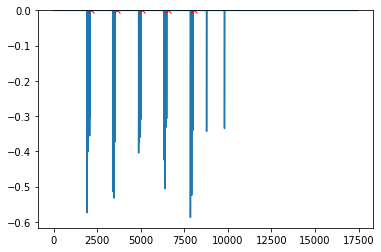

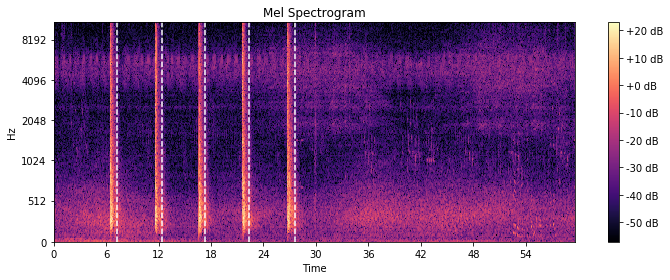

--------------------------------------------------


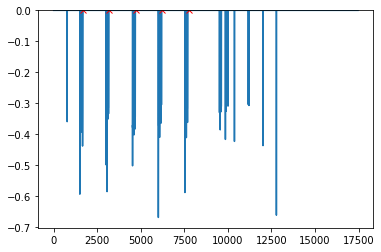

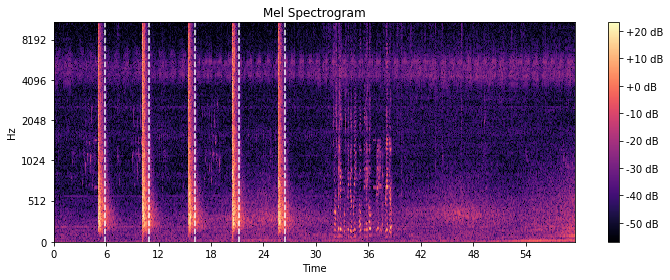

--------------------------------------------------


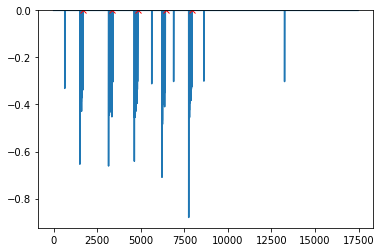

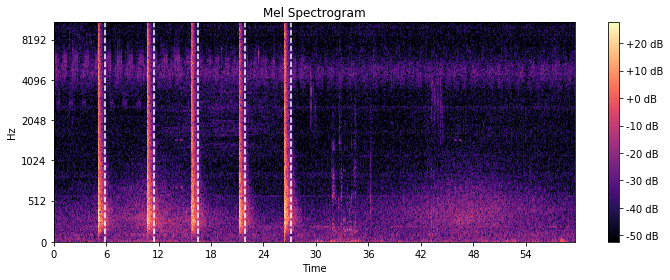

--------------------------------------------------


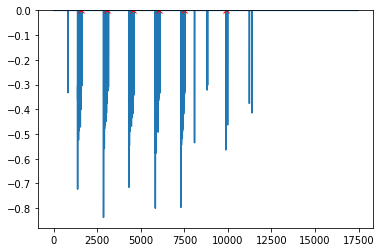

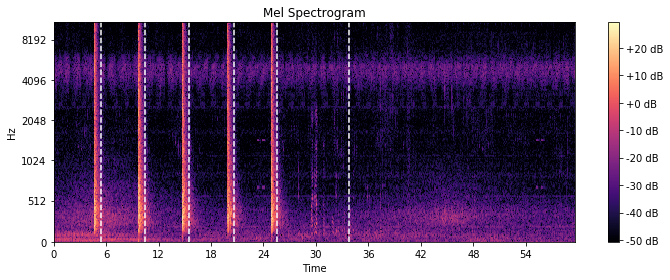

--------------------------------------------------


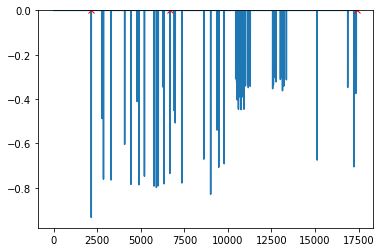

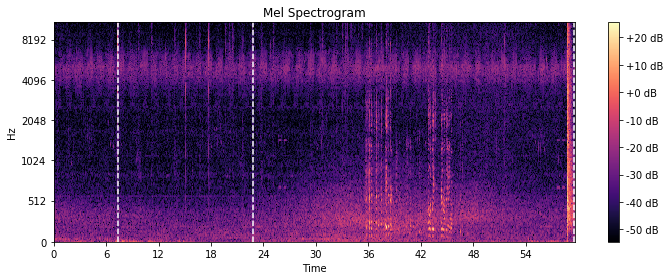

--------------------------------------------------


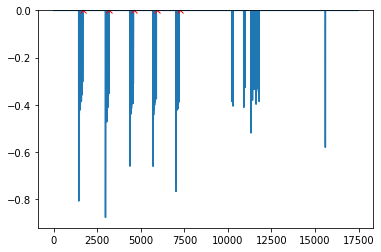

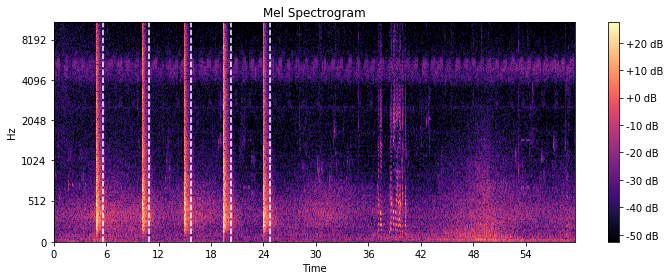

--------------------------------------------------


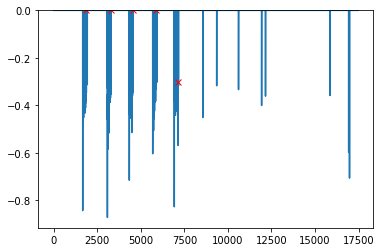

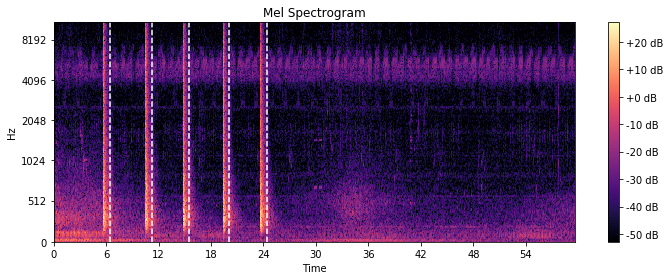

--------------------------------------------------


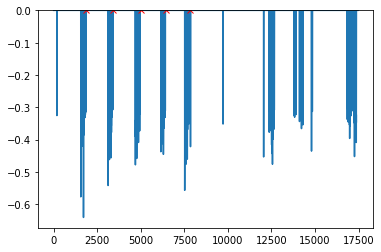

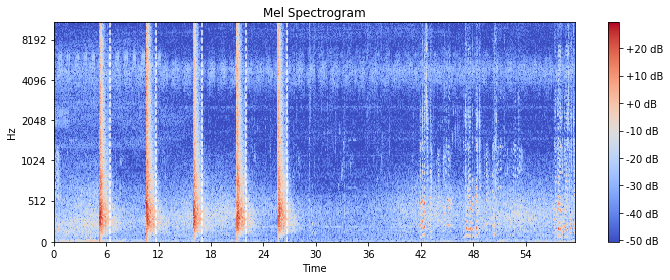

--------------------------------------------------


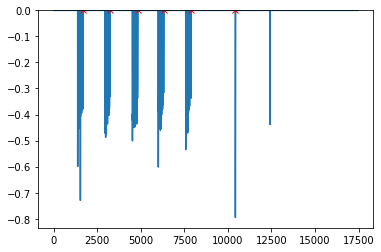

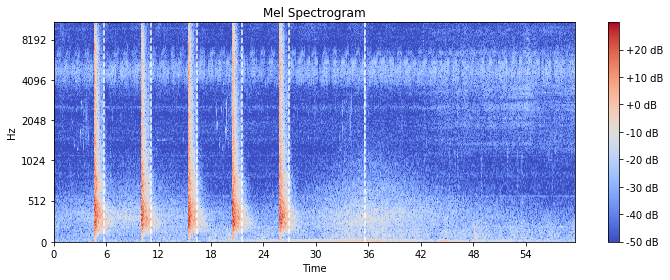

--------------------------------------------------


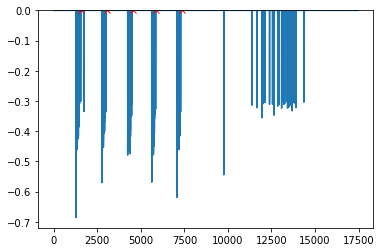

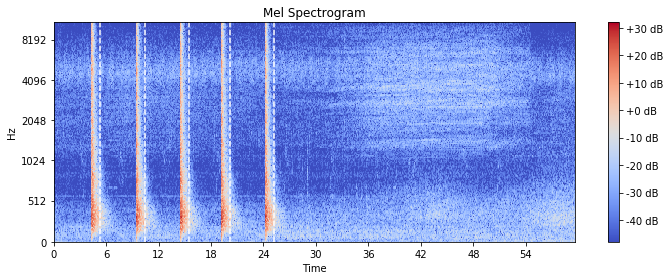

In [4]:
for signal in signals:
    audio = Onset_Detect(signal, SR, N_FFT, HOP_LEN)
    onsets = audio.onset_detect(split_part=50)
    audio = Offset_Detect(signal, SR, N_FFT, HOP_LEN)
    offsets = audio.offset_detect(onsets, split_part=50)
    
    print('-' * 50)
    audio.draw_spectral_flux(offsets)
    
    audio.spectrogram()
    audio.draw_vlines(offsets)
    audio.show()